# **DSUxDIPD Data Competition**
## NYPD Arrest Discrimination Analysis

### Problem statement
Find evidence of discrimination and bias based off a demographic of civilian population in the New York criminal system. Provide visualizations, models, or tables of data that help support your case. 


## *Data Retrieval*

In [1]:
import pandas as pd
arrestsdf = pd.read_csv("/Users/ankushbharadwaj/Downloads/NYPD_Arrests_Data__Historic_.csv")

In [2]:
print(arrestsdf.shape)
arrestsdf.head(10)

(4798339, 18)


,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude
0,173130602,12/31/2017,566.0,"MARIJUANA, POSSESSION",678.0,MISCELLANEOUS PENAL LAW,PL 2210500,V,Q,105,0.0,25-44,M,BLACK,1063056.0,207463.0,40.735772,-73.715638
1,173114463,12/31/2017,478.0,"THEFT OF SERVICES, UNCLASSIFIED",343.0,OTHER OFFENSES RELATED TO THEFT,PL 1651503,M,Q,114,0.0,25-44,M,ASIAN / PACIFIC ISLANDER,1009113.0,219613.0,40.769437,-73.910241
2,173113513,12/31/2017,849.0,"NY STATE LAWS,UNCLASSIFIED VIOLATION",677.0,OTHER STATE LAWS,LOC000000V,V,K,73,1.0,18-24,M,BLACK,1010719.0,186857.0,40.679525,-73.904572
3,173113423,12/31/2017,101.0,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,M,18,0.0,25-44,M,WHITE,987831.0,217446.0,40.763523,-73.987074
4,173113421,12/31/2017,101.0,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,M,18,0.0,45-64,M,BLACK,987073.0,216078.0,40.759768,-73.989811
5,173130583,12/31/2017,397.0,"ROBBERY,UNCLASSIFIED,OPEN AREAS",105.0,ROBBERY,PL 1601001,F,K,73,0.0,18-24,M,BLACK,1007524.0,188555.0,40.684194,-73.916085
6,173129349,12/31/2017,101.0,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,M,9,0.0,18-24,F,WHITE HISPANIC,990592.0,202391.0,40.722199,-73.977122
7,173128438,12/31/2017,511.0,"CONTROLLED SUBSTANCE, POSSESSION 7",235.0,DANGEROUS DRUGS,PL 2200300,M,M,25,0.0,25-44,M,BLACK,999724.0,230625.0,40.799683,-73.944112
8,173128437,12/31/2017,101.0,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,M,23,2.0,25-44,M,BLACK HISPANIC,998165.0,226184.0,40.787496,-73.949752
9,173128433,12/31/2017,705.0,"FORGERY,ETC.-MISD.",358.0,OFFENSES INVOLVING FRAUD,PL 1702000,M,M,17,0.0,18-24,M,WHITE,991195.0,212559.0,40.750107,-73.974936


## *Data Preparation*

The columns and rows with the following conditions should be filtered out:
* columns that provide no information about perpetrator's demographic or their crime or punishment
* rows that have missing values

Columns that provide unnecessary information:
* LAW_CODE
* X_COORD_CD
* Y_COORD_CD
* Latitude
* Longitude

In [3]:
arrestsdf.drop(["LAW_CODE", "X_COORD_CD", "Y_COORD_CD",
               "Latitude", "Longitude"], 
                 axis=1, inplace = True)

In [4]:
for column in arrestsdf:
    missing_val = sum(arrestsdf[column].isnull())
    print("Number of missing values for {}: {}".format(column, missing_val))

Number of missing values for ARREST_KEY: 0
Number of missing values for ARREST_DATE: 0
Number of missing values for PD_CD: 220
Number of missing values for PD_DESC: 8870
Number of missing values for KY_CD: 8870
Number of missing values for OFNS_DESC: 8870
Number of missing values for LAW_CAT_CD: 16103
Number of missing values for ARREST_BORO: 8
Number of missing values for ARREST_PRECINCT: 0
Number of missing values for JURISDICTION_CODE: 10
Number of missing values for AGE_GROUP: 17
Number of missing values for PERP_SEX: 0
Number of missing values for PERP_RACE: 0


We notice that the following columns have missing values:
* PD_CD: Three digit internal classification code
* PD_DESC: Description of crime corresponding to PD_CD
* KY_CD: Three digit internal classification code, more general than PD_CD
* OFNS_DESC: Description of crime corresponding to OFNS_DESC
* LAW_CAT_CD: Level of offense (felony, misdemeanor, violation, infraction)
* ARREST_BORO: Borough of arrest
* JURISDICTION_CODE: Jurisdiction responsible for arrest (0 is Patrol, 1 is Transit, 2 is Housing, >3 is non NYPD)
* AGE_GROUP: Perpetrator's age

In [5]:
arrestsdf.dropna(inplace = True)

In [6]:
arrestsdf.dtypes

ARREST_KEY             int64
ARREST_DATE           object
PD_CD                float64
PD_DESC               object
KY_CD                float64
OFNS_DESC             object
LAW_CAT_CD            object
ARREST_BORO           object
ARREST_PRECINCT        int64
JURISDICTION_CODE    float64
AGE_GROUP             object
PERP_SEX              object
PERP_RACE             object
dtype: object

In [7]:
cols = ["PD_DESC", "OFNS_DESC", "LAW_CAT_CD", "ARREST_BORO", "AGE_GROUP",
       "PERP_SEX", "PERP_RACE"]
for column in cols:
    print("Value counts for {}:".format(column))
    print("--------------------")
    print(arrestsdf[column].value_counts())
    print("--------------------\n")

Value counts for PD_DESC:
--------------------
MARIJUANA, POSSESSION 4 & 5                   422355
ASSAULT 3                                     375999
THEFT OF SERVICES, UNCLASSIFIED               303358
CONTROLLED SUBSTANCE, POSSESSION 7            278080
NY STATE LAWS,UNCLASSIFIED VIOLATION          225678
LARCENY,PETIT FROM OPEN AREAS,UNCLASSIFIED    188347
TRAFFIC,UNCLASSIFIED INFRACTION               165645
ASSAULT 2,1,UNCLASSIFIED                      150823
STOLEN PROPERTY 3,POSSESSION                  149875
ROBBERY,UNCLASSIFIED,OPEN AREAS               143263
TRAFFIC,UNCLASSIFIED MISDEMEAN                117644
CONTROLLED SUBSTANCE,INTENT TO SELL 3         113536
TRESPASS 3, CRIMINAL                          109731
INTOXICATED DRIVING,ALCOHOL                   101711
WEAPONS, POSSESSION, ETC                       96197
TRESPASS 2, CRIMINAL                           86447
LARCENY,GRAND FROM OPEN AREAS,UNCLASSIFIED     85217
CONTROLLED SUBSTANCE,SALE 3                    83890

BLACK                             2319272
WHITE HISPANIC                    1243511
WHITE                              576119
BLACK HISPANIC                     381900
ASIAN / PACIFIC ISLANDER           192212
UNKNOWN                             48725
AMERICAN INDIAN/ALASKAN NATIVE      10429
OTHER                                1363
Name: PERP_RACE, dtype: int64
--------------------



We notie that in the above value counts output, the AGE_GROUP and PERP_RACE columns have  values for "UNKNOWN": rows with these values should be removed as well. Furthermore, the AGE_GROUP column has values that aren't from the set ['<18', '18-24', '25-44', '45-64', '65+']. Rows with these values should be removed as well, as they don't make sense. 

In [8]:
indices = arrestsdf[arrestsdf['AGE_GROUP'] == 'UNKNOWN'].index
arrestsdf.drop(indices, inplace = True)

indices = arrestsdf[arrestsdf['PERP_RACE'] == 'UNKNOWN'].index
arrestsdf.drop(indices, inplace = True)

indices = arrestsdf[(arrestsdf['AGE_GROUP'] != '<18') & 
                   (arrestsdf['AGE_GROUP'] != '18-24') &
                   (arrestsdf['AGE_GROUP'] != '25-44') &
                   (arrestsdf['AGE_GROUP'] != '45-64') &
                   (arrestsdf['AGE_GROUP'] != '65+')].index
arrestsdf.drop(indices, inplace = True)

In [9]:
print("Value counts for AGE_GROUP:")
print("--------------------")
print(arrestsdf["AGE_GROUP"].value_counts())
print("--------------------\n")
print("Value counts for PERP_RACE:")
print("--------------------")
print(arrestsdf["PERP_RACE"].value_counts())
print("--------------------\n")

Value counts for AGE_GROUP:
--------------------
25-44    2164344
18-24    1256156
45-64     867392
<18       398395
65+        38344
Name: AGE_GROUP, dtype: int64
--------------------

Value counts for PERP_RACE:
--------------------
BLACK                             2319187
WHITE HISPANIC                    1243454
WHITE                              576102
BLACK HISPANIC                     381891
ASIAN / PACIFIC ISLANDER           192205
AMERICAN INDIAN/ALASKAN NATIVE      10429
OTHER                                1363
Name: PERP_RACE, dtype: int64
--------------------



## *Exploratory Data Analysis*

The following are factors I'd want to compare with punishment severity to explore demographic bias:
* race of the perpetrator
* age of the perpetrator
* gender of the perpetrator

I will go through these in that order.

### *Race*

In [10]:
race_sev = pd.crosstab(arrestsdf['PERP_RACE'], arrestsdf['LAW_CAT_CD'])

for i in race_sev.index:
    total = sum(race_sev.loc[i])
    new_row = ["%.2f" % (race_sev.loc[i]["F"]/total),
              "%.2f" % (race_sev.loc[i]["I"]/total),
              "%.2f" % (race_sev.loc[i]["M"]/total),
              "%.2f" % (race_sev.loc[i]["V"]/total)]
    race_sev.loc[i] = new_row
print(race_sev)

race_sev = race_sev.astype({"F": float,
                          "I": float,
                          "M": float,
                          "V": float})
race_sev.plot(kind = 'bar', stacked = True, 
              color = ['red', 'blue', 'green', 'yellow'], grid = False)

LAW_CAT_CD                         F     I     M     V
PERP_RACE                                             
AMERICAN INDIAN/ALASKAN NATIVE  0.21  0.01  0.73  0.05
ASIAN / PACIFIC ISLANDER        0.26  0.01  0.69  0.03
BLACK                           0.28  0.00  0.65  0.07
BLACK HISPANIC                  0.27  0.00  0.68  0.05
OTHER                           0.25  0.00  0.70  0.05
WHITE                           0.24  0.01  0.71  0.05
WHITE HISPANIC                  0.25  0.01  0.68  0.06


### *Age*

LAW_CAT_CD     F     I     M     V
AGE_GROUP                         
18-24       0.26  0.00  0.67  0.06
25-44       0.26  0.01  0.67  0.06
45-64       0.24  0.01  0.68  0.07
65+         0.25  0.01  0.69  0.06
<18         0.32  0.00  0.65  0.03


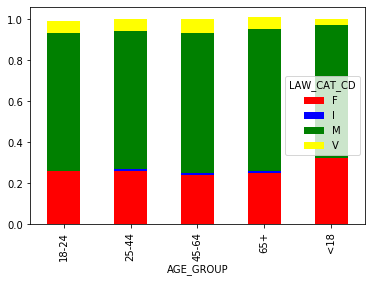

In [11]:
age_sev = pd.crosstab(arrestsdf['AGE_GROUP'], arrestsdf['LAW_CAT_CD'])

for i in age_sev.index:
    total = sum(age_sev.loc[i])
    new_row = ["%.2f" % (age_sev.loc[i]["F"]/total),
              "%.2f" % (age_sev.loc[i]["I"]/total),
              "%.2f" % (age_sev.loc[i]["M"]/total),
              "%.2f" % (age_sev.loc[i]["V"]/total)]
    age_sev.loc[i] = new_row
print(age_sev)

age_sev = age_sev.astype({"F": float,
                          "I": float,
                          "M": float,
                          "V": float})
age_sev.plot(kind = 'bar', stacked = True, 
              color = ['red', 'blue', 'green', 'yellow'], grid = False)

### *Gender*

LAW_CAT_CD     F     I     M     V
PERP_SEX                          
F           0.25  0.00  0.72  0.02
M           0.27  0.01  0.66  0.07


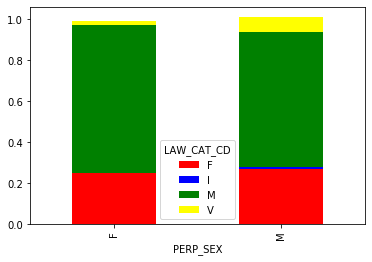

In [12]:
gender_sev = pd.crosstab(arrestsdf['PERP_SEX'], arrestsdf['LAW_CAT_CD'])

for i in gender_sev.index:
    total = sum(gender_sev.loc[i])
    new_row = ["%.2f" % (gender_sev.loc[i]["F"]/total),
              "%.2f" % (gender_sev.loc[i]["I"]/total),
              "%.2f" % (gender_sev.loc[i]["M"]/total),
              "%.2f" % (gender_sev.loc[i]["V"]/total)]
    gender_sev.loc[i] = new_row
print(gender_sev)

gender_sev = gender_sev.astype({"F": float,
                          "I": float,
                          "M": float,
                          "V": float})
gender_sev.plot(kind = 'bar', stacked = True, 
              color = ['red', 'blue', 'green', 'yellow'], grid = False)

From here, I'm curious about further investigating the following:
* the punishment severity for each race demographic within their age groups
* the punishment severity for each race demographic within their gender
* the punishment severity for each age group within their gender

### *Race and Age*

Punishment Severity by Race for <18 Age Group


LAW_CAT_CD                         F    I     M     V
PERP_RACE                                            
AMERICAN INDIAN/ALASKAN NATIVE  0.26  0.0  0.71  0.02
ASIAN / PACIFIC ISLANDER        0.30  0.0  0.67  0.02
BLACK                           0.36  0.0  0.61  0.03
BLACK HISPANIC                  0.31  0.0  0.67  0.02
OTHER                           0.25  0.0  0.73  0.02
WHITE                           0.23  0.0  0.74  0.02
WHITE HISPANIC                  0.27  0.0  0.70  0.03


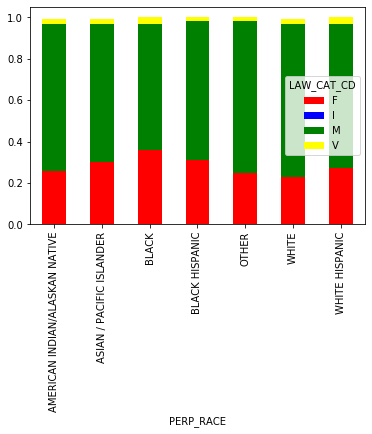



Punishment Severity by Race for 18-24 Age Group


LAW_CAT_CD                         F     I     M     V
PERP_RACE                                             
AMERICAN INDIAN/ALASKAN NATIVE  0.21  0.01  0.73  0.05
ASIAN / PACIFIC ISLANDER        0.25  0.01  0.70  0.04
BLACK                           0.29  0.00  0.65  0.06
BLACK HISPANIC                  0.27  0.00  0.69  0.05
OTHER                           0.23  0.00  0.73  0.04
WHITE                           0.21  0.01  0.73  0.05
WHITE HISPANIC                  0.24  0.01  0.69  0.06


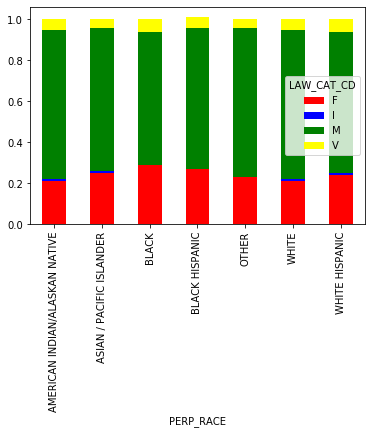



Punishment Severity by Race for 25-44 Age Group


LAW_CAT_CD                         F     I     M     V
PERP_RACE                                             
AMERICAN INDIAN/ALASKAN NATIVE  0.20  0.01  0.74  0.05
ASIAN / PACIFIC ISLANDER        0.27  0.01  0.69  0.03
BLACK                           0.27  0.01  0.66  0.07
BLACK HISPANIC                  0.27  0.00  0.68  0.05
OTHER                           0.26  0.00  0.69  0.05
WHITE                           0.24  0.01  0.70  0.05
WHITE HISPANIC                  0.25  0.01  0.68  0.07


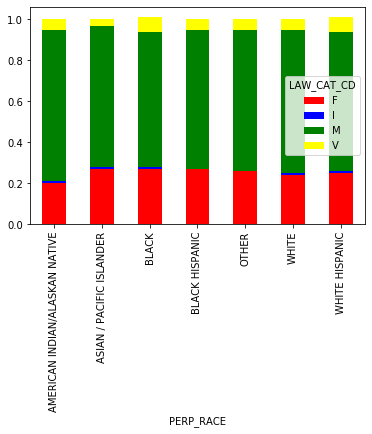



Punishment Severity by Race for 45-64 Age Group


LAW_CAT_CD                         F     I     M     V
PERP_RACE                                             
AMERICAN INDIAN/ALASKAN NATIVE  0.20  0.01  0.72  0.07
ASIAN / PACIFIC ISLANDER        0.26  0.01  0.70  0.03
BLACK                           0.24  0.00  0.68  0.08
BLACK HISPANIC                  0.27  0.00  0.67  0.06
OTHER                           0.26  0.00  0.69  0.06
WHITE                           0.25  0.01  0.69  0.06
WHITE HISPANIC                  0.25  0.01  0.67  0.07


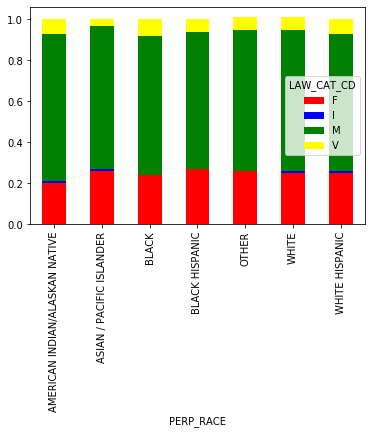



Punishment Severity by Race for 65+ Age Group


LAW_CAT_CD                         F     I     M     V
PERP_RACE                                             
AMERICAN INDIAN/ALASKAN NATIVE  0.26  0.00  0.71  0.03
ASIAN / PACIFIC ISLANDER        0.22  0.01  0.75  0.03
BLACK                           0.24  0.01  0.69  0.06
BLACK HISPANIC                  0.26  0.01  0.67  0.07
OTHER                           0.22  0.00  0.67  0.11
WHITE                           0.25  0.01  0.69  0.06
WHITE HISPANIC                  0.26  0.01  0.68  0.06


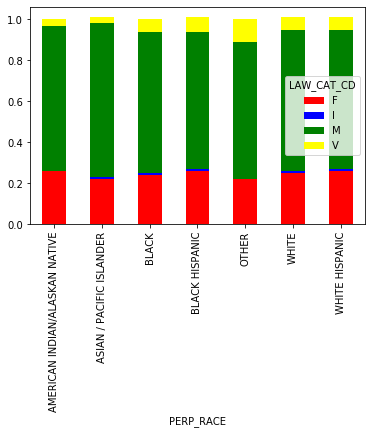

In [13]:
age_groups = ["<18", "18-24", "25-44", "45-64", "65+"]
import matplotlib.pyplot as plt

for j in age_groups:
    working_df = arrestsdf[arrestsdf["AGE_GROUP"] == j]
    race_sev = pd.crosstab(working_df['PERP_RACE'], working_df['LAW_CAT_CD'])
    
    for i in race_sev.index:
        total = sum(race_sev.loc[i])
        new_row = ["%.2f" % (race_sev.loc[i]["F"]/total),
                  "%.2f" % (race_sev.loc[i]["I"]/total),
                  "%.2f" % (race_sev.loc[i]["M"]/total),
                  "%.2f" % (race_sev.loc[i]["V"]/total)]
        race_sev.loc[i] = new_row

    race_sev = race_sev.astype({"F": float,
                              "I": float,
                              "M": float,
                              "V": float})
    print("Punishment Severity by Race for {} Age Group".format(j))
    print("\n")
    print(race_sev)
    plt.show(race_sev.plot(kind = 'bar', stacked = True, color = ['red', 'blue', 'green', 'yellow'], grid = False))
    print("\n")


### *Race and Gender*

Punishment Severity by Race for M Gender


LAW_CAT_CD                         F     I     M     V
PERP_RACE                                             
AMERICAN INDIAN/ALASKAN NATIVE  0.21  0.01  0.72  0.06
ASIAN / PACIFIC ISLANDER        0.26  0.01  0.69  0.04
BLACK                           0.28  0.00  0.64  0.07
BLACK HISPANIC                  0.28  0.00  0.67  0.05
OTHER                           0.25  0.00  0.69  0.05
WHITE                           0.24  0.01  0.70  0.06
WHITE HISPANIC                  0.25  0.01  0.67  0.07


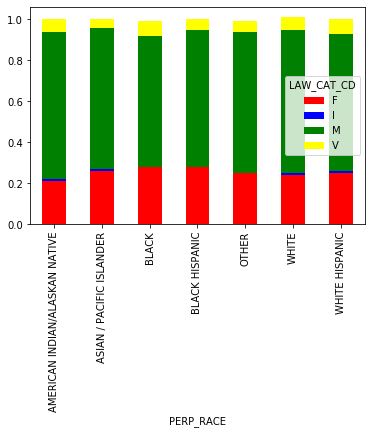



Punishment Severity by Race for F Gender


LAW_CAT_CD                         F    I     M     V
PERP_RACE                                            
AMERICAN INDIAN/ALASKAN NATIVE  0.18  0.0  0.80  0.02
ASIAN / PACIFIC ISLANDER        0.26  0.0  0.73  0.01
BLACK                           0.27  0.0  0.70  0.03
BLACK HISPANIC                  0.25  0.0  0.73  0.02
OTHER                           0.19  0.0  0.80  0.01
WHITE                           0.22  0.0  0.75  0.03
WHITE HISPANIC                  0.23  0.0  0.74  0.02


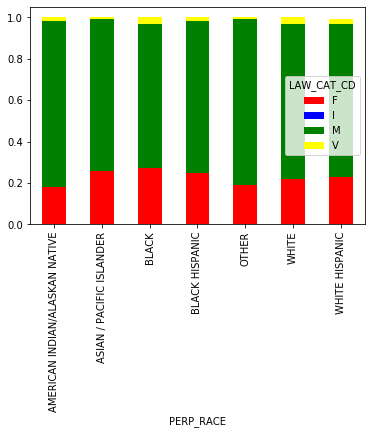

In [14]:
gender_groups = ["M", "F"]

for j in gender_groups:
    working_df = arrestsdf[arrestsdf["PERP_SEX"] == j]
    gender_sev = pd.crosstab(working_df['PERP_RACE'], working_df['LAW_CAT_CD'])
    
    for i in gender_sev.index:
        total = sum(gender_sev.loc[i])
        new_row = ["%.2f" % (gender_sev.loc[i]["F"]/total),
                  "%.2f" % (gender_sev.loc[i]["I"]/total),
                  "%.2f" % (gender_sev.loc[i]["M"]/total),
                  "%.2f" % (gender_sev.loc[i]["V"]/total)]
        gender_sev.loc[i] = new_row

    gender_sev = gender_sev.astype({"F": float,
                              "I": float,
                              "M": float,
                              "V": float})
    print("Punishment Severity by Race for {} Gender".format(j))
    print("\n")
    print(gender_sev)
    plt.show(gender_sev.plot(kind = 'bar', stacked = True, color = ['red', 'blue', 'green', 'yellow'], grid = False))
    print("\n")


### *Age and Gender*

Punishment Severity by Gender for <18 Age Group


LAW_CAT_CD     F    I     M     V
PERP_SEX                         
F           0.24  0.0  0.75  0.01
M           0.34  0.0  0.62  0.03


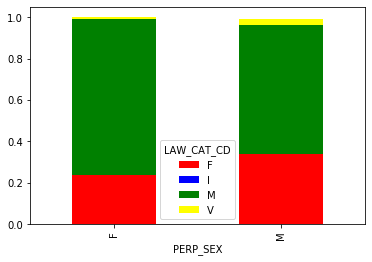



Punishment Severity by Gender for 18-24 Age Group


LAW_CAT_CD     F    I     M     V
PERP_SEX                         
F           0.24  0.0  0.74  0.03
M           0.27  0.0  0.66  0.07


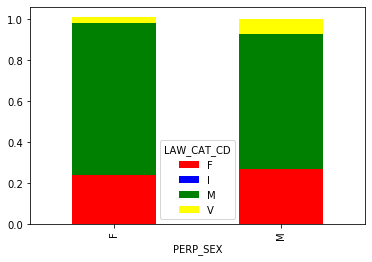



Punishment Severity by Gender for 25-44 Age Group


LAW_CAT_CD     F     I     M     V
PERP_SEX                          
F           0.26  0.00  0.71  0.02
M           0.26  0.01  0.66  0.07


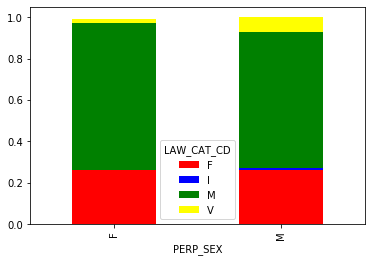



Punishment Severity by Gender for 45-64 Age Group


LAW_CAT_CD     F     I     M     V
PERP_SEX                          
F           0.26  0.00  0.71  0.03
M           0.24  0.01  0.67  0.08


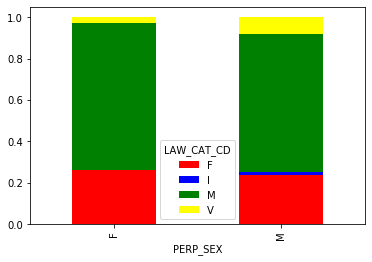



Punishment Severity by Gender for 65+ Age Group


LAW_CAT_CD     F     I     M     V
PERP_SEX                          
F           0.24  0.00  0.72  0.04
M           0.25  0.01  0.68  0.06


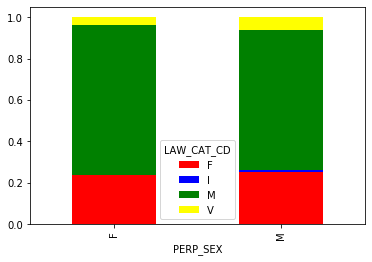

In [15]:
gender_groups = ["M", "F"]
age_groups = ["<18", "18-24", "25-44", "45-64", "65+"]

for j in age_groups:
    working_df = arrestsdf[arrestsdf["AGE_GROUP"] == j]
    gender_sev = pd.crosstab(working_df['PERP_SEX'], working_df['LAW_CAT_CD'])
    
    for i in gender_sev.index:
        total = sum(gender_sev.loc[i])
        new_row = ["%.2f" % (gender_sev.loc[i]["F"]/total),
                  "%.2f" % (gender_sev.loc[i]["I"]/total),
                  "%.2f" % (gender_sev.loc[i]["M"]/total),
                  "%.2f" % (gender_sev.loc[i]["V"]/total)]
        gender_sev.loc[i] = new_row

    gender_sev = gender_sev.astype({"F": float,
                              "I": float,
                              "M": float,
                              "V": float})
    print("Punishment Severity by Gender for {} Age Group".format(j))
    print("\n")
    print(gender_sev)
    plt.show(gender_sev.plot(kind = 'bar', stacked = True, color = ['red', 'blue', 'green', 'yellow'], grid = False))
    print("\n")


Following this exploratory data analysis, I have decided that the first examples of demographic prejudice by the NY criminal system that I will investigate will be the relationship between a perpetrator's race and the severity of punishment recieved. To continue to conducting statistical tests, the following needs to be completed:
* generate contingency and frequency tables
* write the cleaned dataset to a CSV
* generate some bar plots that compare the frequency of different punishment severities between different racial groups 

### *Frequency Tables and CSV Output*

In [24]:
race_sev = pd.crosstab(arrestsdf['PERP_RACE'], arrestsdf['LAW_CAT_CD'])

for i in race_sev.index:
    total = sum(race_sev.loc[i])
    new_row = ["%.2f" % (race_sev.loc[i]["F"]/total),
              "%.2f" % (race_sev.loc[i]["I"]/total),
              "%.2f" % (race_sev.loc[i]["M"]/total),
              "%.2f" % (race_sev.loc[i]["V"]/total)]
    race_sev.loc[i] = new_row

race_sev = race_sev.astype({"F": float,
                          "I": float,
                          "M": float,
                          "V": float})

racesevdf = pd.DataFrame(columns = ["PERP_RACE","F", "I", "M", "V"], 
                    index = range(0,7))
races = ["AMERICAN INDIAN/ALASKAN NATIVE", "ASIAN / PACIFIC ISLANDER", "BLACK",
                            "BLACK HISPANIC", "OTHER", "WHITE", "WHITE HISPANIC"]
print(race_sev)
for i in range(0,7):
    new_row = [races[i], race_sev.iloc[i]["F"], race_sev.iloc[i]["I"], 
               race_sev.iloc[i]["M"], race_sev.iloc[i]["V"]]
    racesevdf.iloc[i] = new_row
print("\n")
print(racesevdf)
racesevdf.to_csv('race_sevdf.csv', header = True)
arrestsdf.to_csv('arrestsdf_cleaned.csv', header = True)

LAW_CAT_CD                         F     I     M     V
PERP_RACE                                             
AMERICAN INDIAN/ALASKAN NATIVE  0.21  0.01  0.73  0.05
ASIAN / PACIFIC ISLANDER        0.26  0.01  0.69  0.03
BLACK                           0.28  0.00  0.65  0.07
BLACK HISPANIC                  0.27  0.00  0.68  0.05
OTHER                           0.25  0.00  0.70  0.05
WHITE                           0.24  0.01  0.71  0.05
WHITE HISPANIC                  0.25  0.01  0.68  0.06


                        PERP_RACE     F     I     M     V
0  AMERICAN INDIAN/ALASKAN NATIVE  0.21  0.01  0.73  0.05
1        ASIAN / PACIFIC ISLANDER  0.26  0.01  0.69  0.03
2                           BLACK  0.28     0  0.65  0.07
3                  BLACK HISPANIC  0.27     0  0.68  0.05
4                           OTHER  0.25     0   0.7  0.05
5                           WHITE  0.24  0.01  0.71  0.05
6                  WHITE HISPANIC  0.25  0.01  0.68  0.06


### *Proportion of Punishments over All Races*

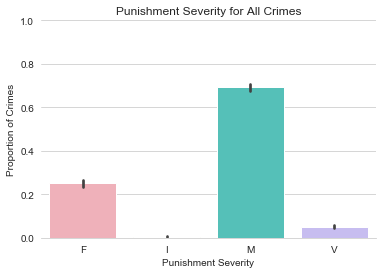

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")
sns.set_palette(sns.husl_palette(4, l = .775))

g = sns.barplot(data=race_sev)
sns.despine(left=True)
plt.xlabel("Punishment Severity") 
plt.ylabel("Proportion of Crimes")
plt.ylim(0,1.0) 
plt.title("Punishment Severity for All Crimes")
plt.savefig('sev_all_crimes.png')
plt.show(g)

### *Proportion of Punishments for American Indian / Alaskan Native Individuals*

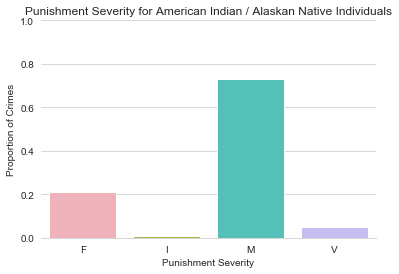

In [28]:
working_series = race_sev.loc['AMERICAN INDIAN/ALASKAN NATIVE']
sns.set_style("whitegrid")
sns.set_palette(sns.husl_palette(4, l = .775))
g = sns.barplot(y = [working_series["F"], working_series["I"],
                     working_series["M"], working_series["V"]], 
                x = ["F", "I", "M", "V"])
sns.despine(left=True)
plt.xlabel("Punishment Severity") 
plt.ylabel("Proportion of Crimes")
plt.ylim(0,1.0) 
plt.title("Punishment Severity for American Indian / Alaskan Native Individuals")
plt.savefig('ai-an-sev.png')
plt.show(g)

### *Proportion of Punishments for Asian / Pacific Islander Individuals*

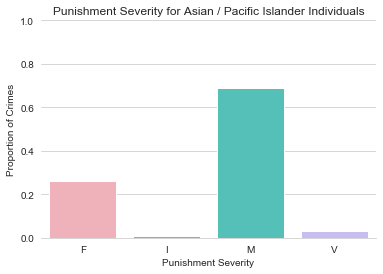

In [30]:
working_series = race_sev.loc['ASIAN / PACIFIC ISLANDER']
sns.set_style("whitegrid")
sns.set_palette(sns.husl_palette(4, l = .775))
g = sns.barplot(y = [working_series["F"], working_series["I"],
                     working_series["M"], working_series["V"]], 
                x = ["F", "I", "M", "V"])
sns.despine(left=True)
plt.xlabel("Punishment Severity") 
plt.ylabel("Proportion of Crimes")
plt.ylim(0,1.0) 
plt.title("Punishment Severity for Asian / Pacific Islander Individuals")
plt.savefig('a-pi-sev.png')
plt.show(g)

### *Proportion of Punishments for Black Individuals*

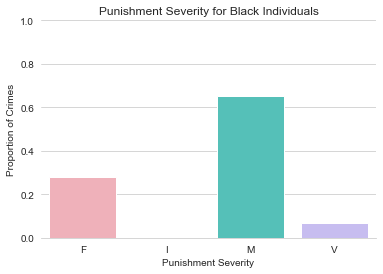

In [31]:
working_series = race_sev.loc['BLACK']
sns.set_style("whitegrid")
sns.set_palette(sns.husl_palette(4, l = .775))
g = sns.barplot(y = [working_series["F"], working_series["I"],
                     working_series["M"], working_series["V"]], 
                x = ["F", "I", "M", "V"])
sns.despine(left=True)
plt.xlabel("Punishment Severity") 
plt.ylabel("Proportion of Crimes")
plt.ylim(0,1.0) 
plt.title("Punishment Severity for Black Individuals")
plt.savefig('b-sev.png')
plt.show(g)


### *Proportion of Punishments for Black Hispanic Individuals*

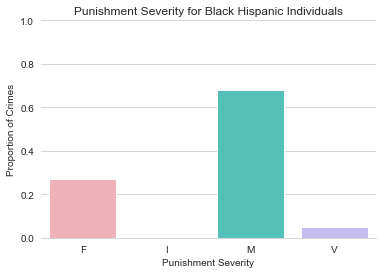

In [32]:
working_series = race_sev.loc['BLACK HISPANIC']
sns.set_style("whitegrid")
sns.set_palette(sns.husl_palette(4, l = .775))
g = sns.barplot(y = [working_series["F"], working_series["I"],
                     working_series["M"], working_series["V"]], 
                x = ["F", "I", "M", "V"])
sns.despine(left=True)
plt.xlabel("Punishment Severity") 
plt.ylabel("Proportion of Crimes")
plt.ylim(0,1.0) 
plt.title("Punishment Severity for Black Hispanic Individuals")
plt.savefig('bh-sev.png')
plt.show(g)

### *Proportion of Punishments for Other Individuals*

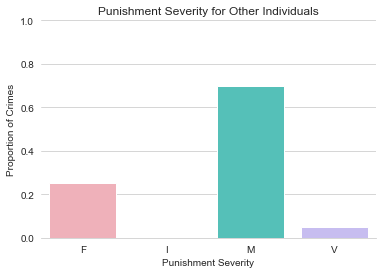

In [33]:
working_series = race_sev.loc['OTHER']
sns.set_style("whitegrid")
sns.set_palette(sns.husl_palette(4, l = .775))
g = sns.barplot(y = [working_series["F"], working_series["I"],
                     working_series["M"], working_series["V"]], 
                x = ["F", "I", "M", "V"])
sns.despine(left=True)
plt.xlabel("Punishment Severity") 
plt.ylabel("Proportion of Crimes")
plt.ylim(0,1.0) 
plt.title("Punishment Severity for Other Individuals")
plt.savefig('o-sev.png')
plt.show(g)

### *Proportion of Punishments for White Individuals*

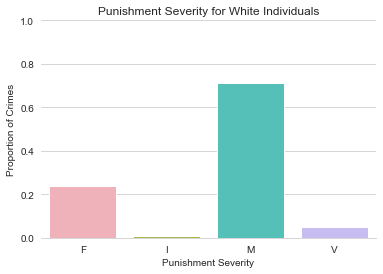

In [34]:
working_series = race_sev.loc['WHITE']
sns.set_style("whitegrid")
sns.set_palette(sns.husl_palette(4, l = .775))
g = sns.barplot(y = [working_series["F"], working_series["I"],
                     working_series["M"], working_series["V"]], 
                x = ["F", "I", "M", "V"])
sns.despine(left=True)
plt.xlabel("Punishment Severity") 
plt.ylabel("Proportion of Crimes")
plt.ylim(0,1.0) 
plt.title("Punishment Severity for White Individuals")
plt.savefig('w-sev.png')
plt.show(g)

### *Proportion of Punishments for White Hispanic Individuals*

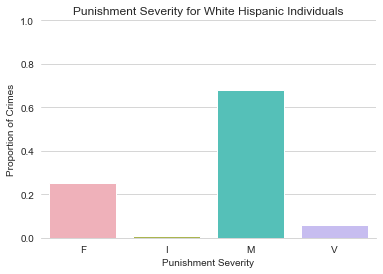

In [35]:
working_series = race_sev.loc['WHITE HISPANIC']
sns.set_style("whitegrid")
sns.set_palette(sns.husl_palette(4, l = .775))
g = sns.barplot(y = [working_series["F"], working_series["I"],
                     working_series["M"], working_series["V"]], 
                x = ["F", "I", "M", "V"])
sns.despine(left=True)
plt.xlabel("Punishment Severity") 
plt.ylabel("Proportion of Crimes")
plt.ylim(0,1.0) 
plt.title("Punishment Severity for White Hispanic Individuals")
plt.savefig('wh-sev.')
plt.show(g)

## *Statistical Testing*

In [38]:
print(race_sev)
print("\n")
race_sev_overall = pd.crosstab(arrestsdf['PERP_RACE'], arrestsdf['LAW_CAT_CD'])
print(race_sev_overall)

LAW_CAT_CD                         F     I     M     V
PERP_RACE                                             
AMERICAN INDIAN/ALASKAN NATIVE  0.21  0.01  0.73  0.05
ASIAN / PACIFIC ISLANDER        0.26  0.01  0.69  0.03
BLACK                           0.28  0.00  0.65  0.07
BLACK HISPANIC                  0.27  0.00  0.68  0.05
OTHER                           0.25  0.00  0.70  0.05
WHITE                           0.24  0.01  0.71  0.05
WHITE HISPANIC                  0.25  0.01  0.68  0.06


LAW_CAT_CD                           F      I        M       V
PERP_RACE                                                     
AMERICAN INDIAN/ALASKAN NATIVE    2170    106     7609     544
ASIAN / PACIFIC ISLANDER         50244   1882   133552    6527
BLACK                           641057  10039  1514777  153314
BLACK HISPANIC                  103782   1428   259209   17472
OTHER                              339      4      955      65
WHITE                           135864   3878   407261   29099

As is noticeable from the previous frequency table, as well as through the previous bar plots, there is potential bias towards Black individuals, as their felony rates are higher than every other race. To that extent, I will be implementing Z-tests to determine if the differences in the proportion of felonies handed to Black individuals compared to individuals of other races is statistically significant.

For each of these tests, the null hypothesis will state that the proportion of felonies handed to Black individuals is the less than or equal to the proportion of felonies given to individuals of the race we are observing. The alternate hypothesis will state that the proportion of felonies handed to Black individuals is greater than the proportion of felonies given to individuals of the race we are observing. Therefore, this will be a two proportion, one-tailed Z-test. The alpha value set for this will be the standard .05, which means that a p-value below .05 indicates that we should reject the null hypothesis. 

In [44]:
print(race_sevdf)

                                     F      I        M       V
AMERICAN INDIAN/ALASKAN NATIVE    2170    106     7609     544
ASIAN / PACIFIC ISLANDER         50244   1882   133552    6527
BLACK                           641057  10039  1514777  153314
BLACK HISPANIC                  103782   1428   259209   17472
OTHER                              339      4      955      65
WHITE                           135864   3878   407261   29099
WHITE HISPANIC                  309666   7847   846169   79772


In [48]:
import math
from scipy.stats import norm

total_black_perps = sum(race_sevdf.loc["BLACK"])
prop_black_felony = race_sevdf.loc["BLACK"]["F"]/total_black_perps

for i in race_sevdf.index:
    working_series = race_sevdf.loc[i]
    working_total = sum(working_series)
    working_prop = working_series["F"]/working_total
    working_prop_overall = (working_series["F"]+race_sevdf.loc["BLACK"]["F"])/(total_black_perps+working_total)
    z_score = (prop_black_felony - working_prop)/math.sqrt(working_prop_overall*(1-working_prop_overall)*
                                                           ((1/total_black_perps)+(1/working_total)))
    p_val = norm.sf(abs(z_score))
    if p_val < .05:
        decision = "Reject"
    if p_val >= .05:
        decision = "Fail to reject"
    print("Comparing: BLACK and {} Individuals".format(i))
    print("z-score: {}".format(z_score))
    print("p-value: {}".format(p_val))
    print("Decision: {} the null hypothesis.".format(decision))
    print("---------------------------------------------")
    print("\n")

Comparing: BLACK and AMERICAN INDIAN/ALASKAN NATIVE Individuals
z-score: 15.575824385000406
p-value: 5.313701554514824e-55
Decision: Reject the null hypothesis.
---------------------------------------------


Comparing: BLACK and ASIAN / PACIFIC ISLANDER Individuals
z-score: 14.154562817740782
p-value: 8.751140252954609e-46
Decision: Reject the null hypothesis.
---------------------------------------------


Comparing: BLACK and BLACK Individuals
z-score: 0.0
p-value: 0.5
Decision: Fail to reject the null hypothesis.
---------------------------------------------


Comparing: BLACK and BLACK HISPANIC Individuals
z-score: 5.966381185709352
p-value: 1.2128661256266069e-09
Decision: Reject the null hypothesis.
---------------------------------------------


Comparing: BLACK and OTHER Individuals
z-score: 2.2859075196695566
p-value: 0.0111298347211893
Decision: Reject the null hypothesis.
---------------------------------------------


Comparing: BLACK and WHITE Individuals
z-score: 62.2157

## *Results and Further Work*

As we can see in the above output, we reject the null hypothesis for every comparison between Black individuals and individuals from another race. The null hypothesis states that the proportion of felonies given to Black individuals is less than or equal to the proportion of felonies given to individuals of other races. By disproving this, we have reached the preliminary conclusion that Black individuals are handed more felonies than individuals of other races, which can be used as an argument supporting prejudice in the NY criminal system.

However, using this preliminary conclusion to argue that prejudice exists against Black individuals compared to every other race in the NY criminal system assumes that every race commits similar crimes overall. However, something that the above analysis leaves out is the possibility that Black individuals commit worse crimes than individuals of other races, which is why they are disproportinately given felony convictions. Therefore, the next step of this analysis would be to investigate whether or not Black people are disproportionatey given felony convictions for the same crime compared to other racial groups. 